In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from DS_Planck_Unet import load_planck_model, draw_pic_with_mask, draw_pic, val_pix
from DS_healpix_fragmentation import *
from DS_data_transformation import pic2fits
from DS_detector import *
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from DS_data_transformation import normalize

In [2]:
pix2 = val_pix[0]
pix2

9

In [3]:
cat = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv')
cat = cat[cat['status'] == 'tp']
cat = cat[cat['catalog'] == 'planck_z']
cat = cat[radec2pix(cat['tRA'], cat['tDEC'], 2) == pix2]
cat.index = np.arange(len(cat))
cat.shape

(28, 12)

In [4]:
size = 16

In [5]:
coords = np.stack([cat['tRA'], cat['tDEC']]).T
coords.shape

(28, 2)

In [6]:
matr = one_pixel_fragmentation(2, pix2, 10)

In [7]:
mdict = matr2dict(matr)

In [8]:
pz_model = load_planck_model('/home/rt2122/Models/pz_only/pz_only.ep0014-vl0.006663-l0.004144.hdf5')
act_model = load_planck_model('/home/rt2122/Models/act_ros/act_ros.ep0010-vl0.034228-l0.031086.hdf5')

In [9]:
pz_data_dict = gen_pics_for_detection(pix2, pz_model, step=8)
pz_connected = connect_masks(pz_data_dict['ans'], pz_data_dict['pic_idx'])
del pz_data_dict

In [10]:
act_data_dict = gen_pics_for_detection(pix2, act_model, step=8)
act_connected = connect_masks(act_data_dict['ans'], act_data_dict['pic_idx'])
del act_data_dict

In [11]:
pic, mask = draw_pic_with_mask(None, coords, matr=matr)
ypic = draw_pic(matr, y=True)

In [12]:
def pic9(idx): 
    print(coords[idx])
    x, y = mdict[radec2pix(*coords[idx], 2**11)]
    sm_pic = pic[x-size:x+size, y-size:y+size]
    sm_ypic = ypic[x-size:x+size, y-size:y+size]
    sm_mask = mask[x-size:x+size, y-size:y+size]
    sm_pz = pz_connected[x-size:x+size, y-size:y+size]
    sm_act = act_connected[x-size:x+size, y-size:y+size]
    s = 100
    _, ax = plt.subplots(3, 3, figsize=(14, 14), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.01, hspace=0.05)
    for i in range(2):
        for j in range(3):
            ax[i][j].imshow(sm_pic[:,:,3*i+j])
    for i in range(3):
        for j in range(3):
            ax[i][j].scatter([size], [size], marker='x', c='r', s=s)
    ax[2][0].imshow(sm_ypic[:,:,0])
    ax[2][0].set_xlabel('y map')
    ax[2][1].imshow(sm_pz[:,:,0])
    ax[2][1].set_xlabel('Model 1')
    ax[2][2].imshow(sm_act[:,:,0])
    ax[2][2].set_xlabel('Model 2')

[149.6017812 -11.0690075]


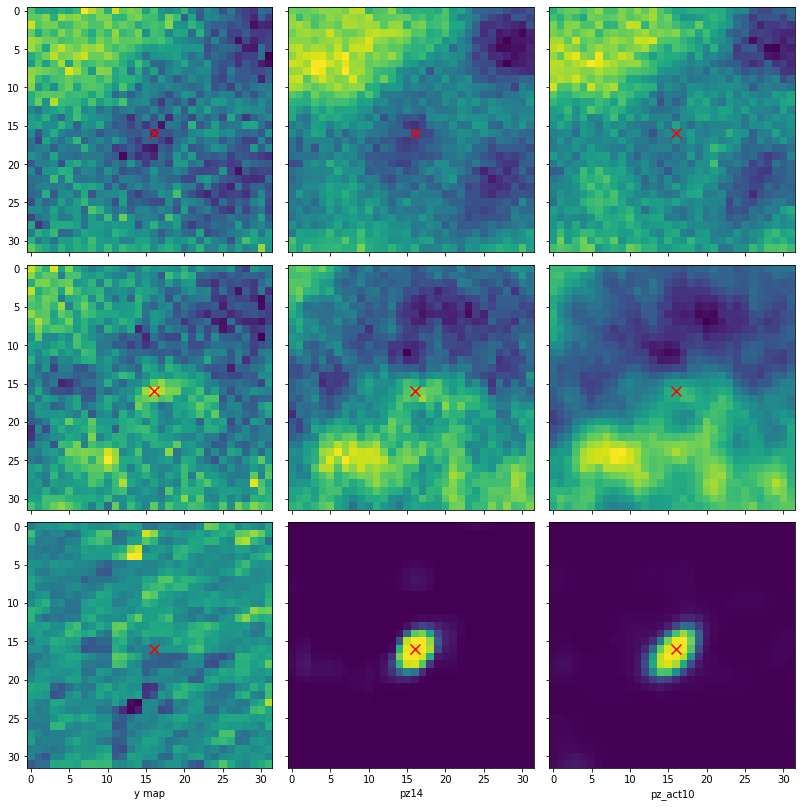

In [48]:
pic9(8)

[146.3822289  -8.6410602]


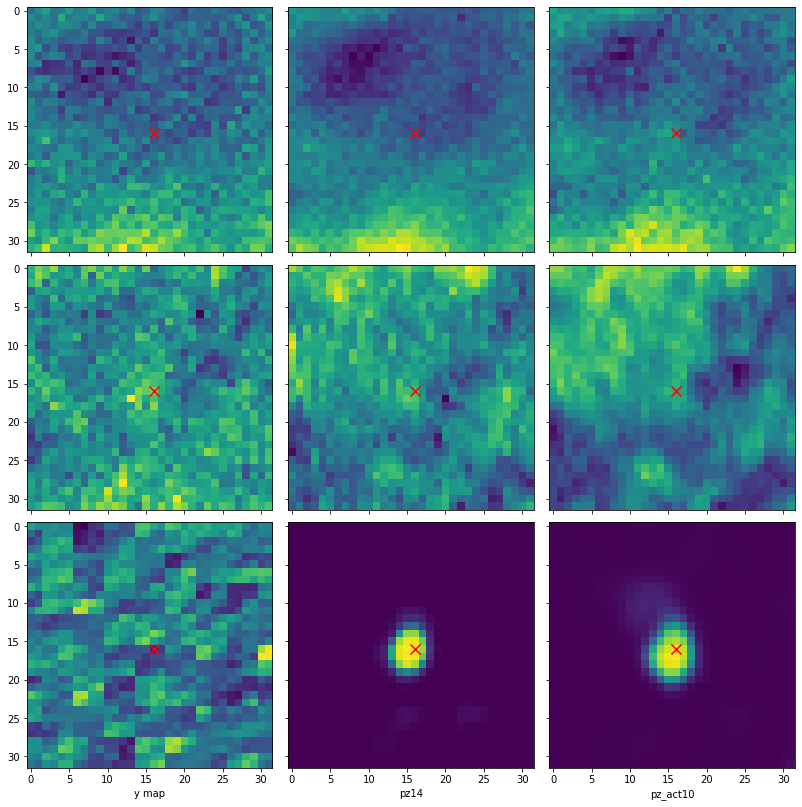

In [36]:
pic9(12)

[164.5697088  -2.1905538]


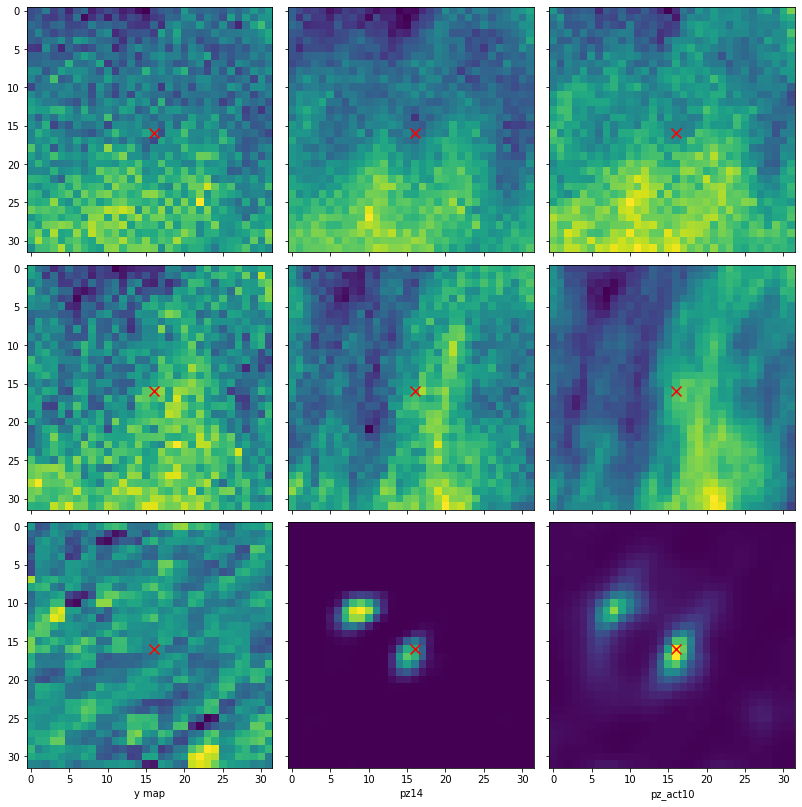

In [37]:
pic9(15)

[143.81963    0.818445]


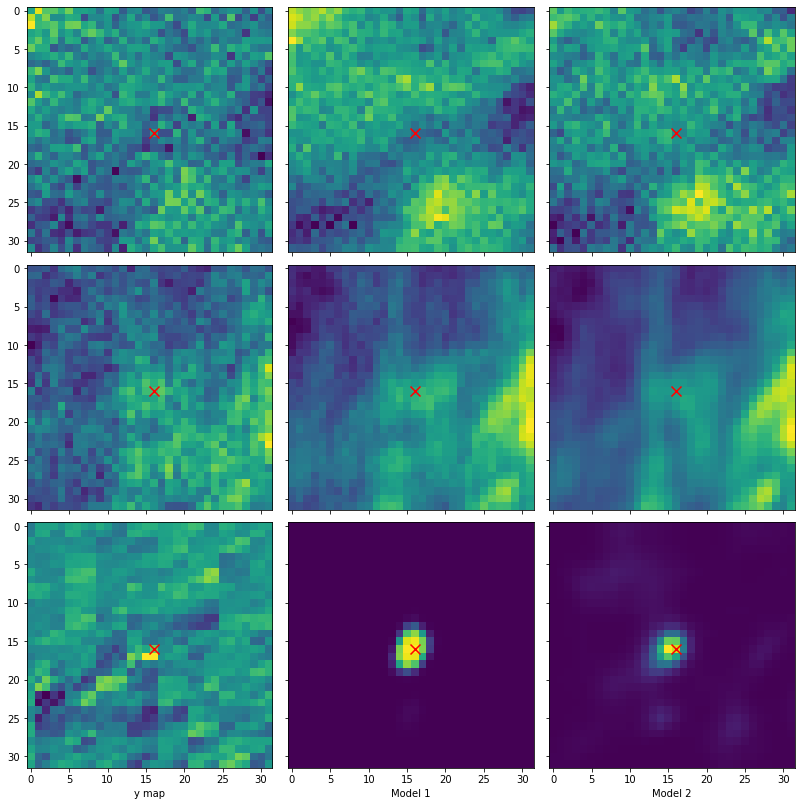

In [13]:
pic9(17)

[168.9492976   1.4961155]


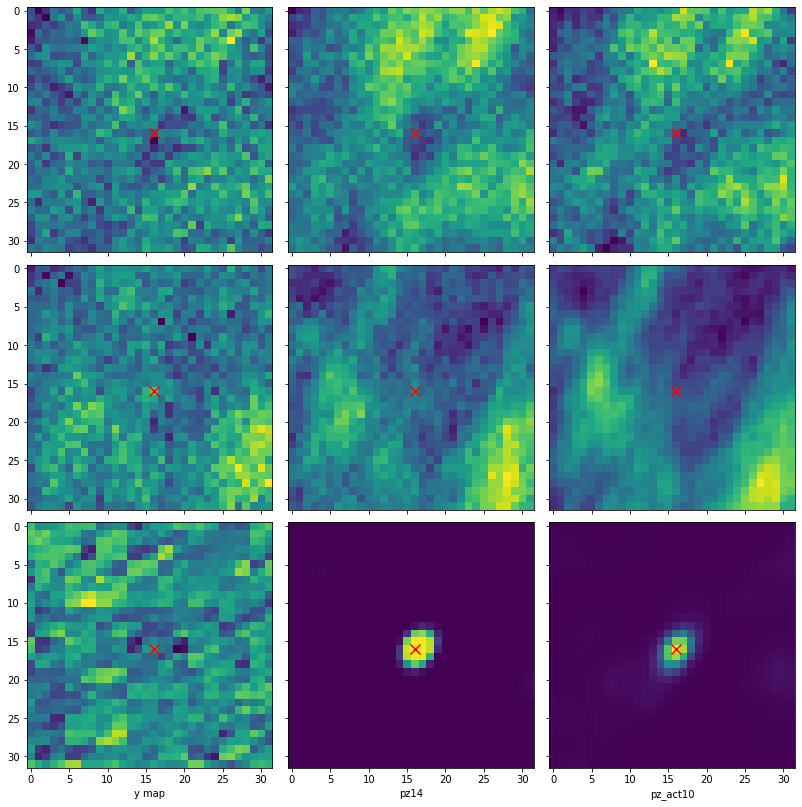

In [39]:
pic9(19)

In [41]:
cat.iloc[17]

RA           143.776
DEC         0.797716
area              22
min_rad      1.45215
max_rad      3.94318
mean_rad     2.79702
min_pred    0.110966
max_pred    0.759099
tRA           143.82
tDEC        0.818445
status            tp
catalog     planck_z
Name: 17, dtype: object

In [44]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')
planck_z[np.abs(planck_z['RA'] - cat.iloc[17]['tRA']) < 0.1]

,Name,RA,DEC,z,M500,MCXC,RedMAPPer
724,PSZ2 G233.68+36.14,143.81963,0.818445,0.356823,5.47738,,RMJ093515.3+004746.0
